<a href="https://colab.research.google.com/github/Hunter-R-S/MAT494/blob/main/UnconstrainedOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAT 494 - HW8 - Unconstrained Optimization**

The following will serve as an example of unconstrained optimization. It comes from QuantEcon's series on methods in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Below we can take a consumer with two goods (consumer theory), and plot their utility and budget constraint at α and 1-α:

Text(0, 0.5, 'U(B=1.5, A)')

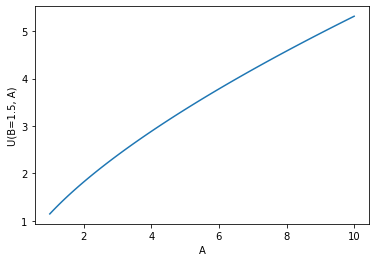

In [2]:
def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)

fig, ax = plt.subplots()
B = 1.5
A = np.linspace(1, 10, 100)
ax.plot(A, U(A, B))
ax.set_xlabel("A")
ax.set_ylabel("U(B=1.5, A)")

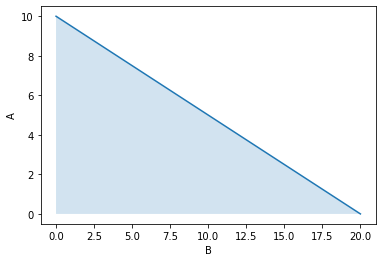

In [3]:
def A_bc(B, W=20, pa=2):
    "Given B, W, and pa return the max amount of A our consumer can afford"
    return (W - B) / pa

def plot_budget_constraint(ax, W=20, pa=2):
    B_bc = np.array([0, W])
    A = A_bc(B_bc, W, pa)
    ax.plot(B_bc, A)
    ax.fill_between(B_bc, 0, A, alpha=0.2)
    ax.set_xlabel("B")
    ax.set_ylabel("A")
    return ax

fig, ax = plt.subplots()
plot_budget_constraint(ax, 20, 2)

We can then turn the problem into an unconstrained version to better understand optimality across varying prices and levels of wealth:

In [5]:
from scipy.optimize import minimize_scalar

def objective(B, W=20, pa=2):
    """
    Return value of -U for a given B, when we consume as much A as possible

    Note that we return -U because scipy wants to minimize functions,
    and the value of B that minimizes -U will maximize U
    """
    A = A_bc(B, W, pa)
    return -U(A, B)

result = minimize_scalar(objective)
optimal_B = result.x
optimal_A = A_bc(optimal_B, 20, 2)
optimal_U = U(optimal_A, optimal_B)

print("The optimal U is ", optimal_U)
print("and was found at (A,B) =", (optimal_A, optimal_B))

The optimal U is  6.666666666666667
and was found at (A,B) = (6.666666630651958, 6.666666738696083)


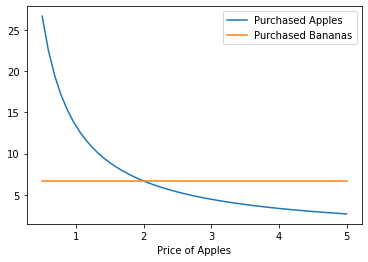

In [6]:
# Create various prices
n_pa = 50
prices_A = np.linspace(0.5, 5.0, n_pa)
W = 20

# Create lists to store the results of the optimal A and B calculation
optimal_As = []
optimal_Bs = []
for pa in prices_A:
    result = minimize_scalar(objective, args=(W, pa))
    opt_B_val = result.x

    optimal_Bs.append(opt_B_val)
    optimal_As.append(A_bc(opt_B_val, W, pa))

fig, ax = plt.subplots()

ax.plot(prices_A, optimal_As, label="Purchased Apples")
ax.plot(prices_A, optimal_Bs, label="Purchased Bananas")
ax.set_xlabel("Price of Apples")
ax.legend()